In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Task 1

In [ ]:
import pandas as pd

# Read the CSV file into a pandas dataframe
path = '/content/drive/MyDrive/DS 3010/yelp_business.csv'
df_business = pd.read_csv(path)
path = '/content/drive/MyDrive/DS 3010/yelp_business_attributes.csv'
df_attributes = pd.read_csv(path)
path = '/content/drive/MyDrive/DS 3010/yelp_r.csv'
df_review = pd.read_csv(path)
path = '/content/drive/MyDrive/DS 3010/yelp_tip.csv'
df_tip = pd.read_csv(path)

In [ ]:
# Filter the business dataset so it contains "business_id" and "review_count"
df_business = df_business[['business_id', 'review_count']]
# Filter the rows based on the value of the 'review_count' column
df_business = df_business[df_business['review_count'] >= 50]
print(len(df_business))
print(df_business.head())

22006
               business_id  review_count
4   PfOCPjBrlQAnz__NXj9h_w           116
18  0FMKDOU8TJT1x87OKYGDTg            65
33  FXHfcFVEfI1vVngW2gVOpw            55
40  tRVx2c89coruPRwYhGTcTw            78
46  1WBkAuQg81kokZIPMpn9Zg           232


In [ ]:
true_counts = df_attributes.apply(lambda x: x[x == 'True'].count())

In [ ]:
print(true_counts.to_string())

business_id                              0
AcceptsInsurance                         0
ByAppointmentOnly                       92
BusinessAcceptsCreditCards           11131
BusinessParking_garage               18845
BusinessParking_street                1697
BusinessParking_validated             7498
BusinessParking_lot                    195
BusinessParking_valet                14598
HairSpecializesIn_coloring             786
HairSpecializesIn_africanamerican        1
HairSpecializesIn_curly                  0
HairSpecializesIn_perms                  0
HairSpecializesIn_kids                   0
HairSpecializesIn_extensions             0
HairSpecializesIn_asian                  0
HairSpecializesIn_straightperms          0
RestaurantsPriceRange2                   1
GoodForKids                              0
WheelchairAccessible                 17838
BikeParking                          34045
Alcohol                               7632
HasTV                                    0
NoiseLevel 

In [ ]:
false_counts = df_attributes.apply(lambda x: x[x == 'False'].count())

In [ ]:
print(false_counts.to_string())

business_id                              0
AcceptsInsurance                         0
ByAppointmentOnly                        3
BusinessAcceptsCreditCards           12450
BusinessParking_garage                1547
BusinessParking_street               37657
BusinessParking_validated            31856
BusinessParking_lot                  38112
BusinessParking_valet                24756
HairSpecializesIn_coloring           38568
HairSpecializesIn_africanamerican        0
HairSpecializesIn_curly                  1
HairSpecializesIn_perms                  1
HairSpecializesIn_kids                   1
HairSpecializesIn_extensions             1
HairSpecializesIn_asian                  1
HairSpecializesIn_straightperms          1
RestaurantsPriceRange2                   0
GoodForKids                              0
WheelchairAccessible                  3136
BikeParking                           5237
Alcohol                               2780
HasTV                                    0
NoiseLevel 

In [ ]:
# Filter the attribute dataset so it contains "business_id" and 3 corresponding Business Parking information(Popular Attribute)
df_attributes_1 = df_attributes.loc[:, ['business_id', 'BusinessAcceptsCreditCards']]
df_attributes_1 = df_attributes_1.loc[~df_attributes_1.isin(['Na']).any(axis=1)]
# Create a list of unique business ids from the first dataset
business_ids = df_business['business_id'].unique()
# Filter the attribute dataset to only include rows with business ids from the business that has counts of review over 50
df_attributes_1 = df_attributes_1[df_attributes_1['business_id'].isin(business_ids)]
print(len(df_attributes_1))
print(df_attributes_1.head())

1178
                business_id BusinessAcceptsCreditCards
17   0FMKDOU8TJT1x87OKYGDTg                      False
253  i-2HewuIRF2ORDT8UfrSUw                       True
395  waJ8_8FGJC-j5uIP2im1-A                       True
476  SorK_8AgBlGWeHDJkupksg                       True
495  RpJ5XykQ2PTqq0SWWtDJaQ                       True


In [ ]:
# Filter the review dataset so it contains "business_id" and "text"
df_review = df_review[['business_id', 'text']]
# Filter the review dataset to only include rows with business ids from the business that has counts of review over 50
df_review = df_review[df_review['business_id'].isin(business_ids)]
# Randomly Sample from the filtered dataset
df_review_sampled = df_review.sample(n=300000)
# Filter the tip dataset so it contains "business_id" and "text"
df_tip = df_tip[['business_id', 'text']]
# Filter the tip dataset to only include rows with business ids from the business that has counts of review over 50
df_tip = df_tip[df_tip['business_id'].isin(business_ids)]
# Randomly Sample from the filtered dataset
df_tip_sampled = df_tip.sample(n=75000)
# Concat the review sample and tip sample together
df_text = pd.concat([df_review_sampled, df_tip_sampled], axis=0, ignore_index=True)
# Merge textual information for each unique business id
df_text_concat = df_text.groupby('business_id')['text'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
print(len(df_text_concat))
print(df_text_concat.head())

21990
              business_id                                               text
0  --9e1ONYQuAa-CB_Rrw7Tw  Bone in ribeye was incredible. Even offered a ...
1  --FBCX-N37CMYDfs790Bnw  We went here to watch the World Series game. Y...
2  --I7YYLada0tSLkORTHb5Q  we have gone to this restaurant several times ...
3  --cZ6Hhc9F7VkKXxHMVZSQ  Yummmmy! Just writing this review is making me...
4  --cjBEbXMI2obtaRHNSFrA  I was really excited to hear that a new Piano ...


In [ ]:
df_combined = df_attributes_1.merge(df_text_concat[['business_id', 'text']], on='business_id', how='left')
# Remove rows with missing values
df_combined = df_combined.dropna(subset=['text'])
print(len(df_combined))
print(df_combined.head())

1176
              business_id BusinessAcceptsCreditCards  \
0  0FMKDOU8TJT1x87OKYGDTg                      False   
1  i-2HewuIRF2ORDT8UfrSUw                       True   
2  waJ8_8FGJC-j5uIP2im1-A                       True   
3  SorK_8AgBlGWeHDJkupksg                       True   
4  RpJ5XykQ2PTqq0SWWtDJaQ                       True   

                                                text  
0  I'm not a fan of haircut chains because of the...  
1  Eric came and checked out a leaky tub we had. ...  
2  Vincent was an honest and hard working owner. ...  
3  Jen is amazing.  I've been getting my lashes d...  
4  These guys are, in a word....awesome.  I've go...  


In [ ]:
# Load the data
df = df_combined

# Count the number of occurrences of each unique value in the 'BusinessParking_lot' column
counts = df['BusinessAcceptsCreditCards'].value_counts()
print(counts)

False    715
True     461
Name: BusinessAcceptsCreditCards, dtype: int64


# Attribute 1

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.83      0.87       151
        True       0.74      0.86      0.80        85

    accuracy                           0.84       236
   macro avg       0.83      0.85      0.83       236
weighted avg       0.85      0.84      0.85       236



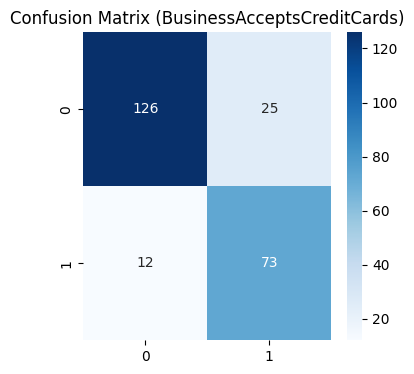

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = df_combined

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['BusinessAcceptsCreditCards']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Resample the training set
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a classifier on the resampled training set
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)


# Evaluate the performance of the classifier on the testing set
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{report}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (BusinessAcceptsCreditCards)')
plt.show()

# Attribute 2

In [ ]:
# Filter the attribute dataset so it contains "business_id" and 3 corresponding Business Parking information(Popular Attribute)
df_attributes_2 = df_attributes.loc[:, ['business_id', 'DogsAllowed']]
df_attributes_2 = df_attributes_2.loc[~df_attributes_2.isin(['Na']).any(axis=1)]
# Create a list of unique business ids from the first dataset
business_ids = df_business['business_id'].unique()
# Filter the attribute dataset to only include rows with business ids from the business that has counts of review over 50
df_attributes_2 = df_attributes_2[df_attributes_2['business_id'].isin(business_ids)]
print(len(df_attributes_2))
print(df_attributes_2.head())

1400
                business_id DogsAllowed
3    PfOCPjBrlQAnz__NXj9h_w       False
43   1WBkAuQg81kokZIPMpn9Zg       False
115  MTH-AcNyWfsBa9sXp04HcQ       False
282  VGRn5KgYKMkqdIKtBUzQQA       False
538  WMj5Uj04pAqFxLMnJQcQqw       False


In [ ]:
df_combined = df_attributes_2.merge(df_text_concat[['business_id', 'text']], on='business_id', how='left')
# Remove rows with missing values
df_combined = df_combined.dropna(subset=['text'])
print(len(df_combined))
print(df_combined.head())

1399
              business_id DogsAllowed  \
0  PfOCPjBrlQAnz__NXj9h_w       False   
1  1WBkAuQg81kokZIPMpn9Zg       False   
2  MTH-AcNyWfsBa9sXp04HcQ       False   
3  VGRn5KgYKMkqdIKtBUzQQA       False   
4  WMj5Uj04pAqFxLMnJQcQqw       False   

                                                text  
0  We stopped here for dinner on a Friday night w...  
1  $6 for fries is ridiculous. Burger, fries and ...  
2  Love, love love their ITALIAN!!! Not a fan of ...  
3  The burger was good but everything else was no...  
4  They were stingy with their portions and the c...  


In [ ]:
# Load the data
df = df_combined

# Count the number of occurrences of each unique value in the 'BusinessParking_lot' column
counts = df['DogsAllowed'].value_counts()
print(counts)

False    1163
True      236
Name: DogsAllowed, dtype: int64


Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       234
        True       1.00      0.83      0.90        46

    accuracy                           0.97       280
   macro avg       0.98      0.91      0.94       280
weighted avg       0.97      0.97      0.97       280



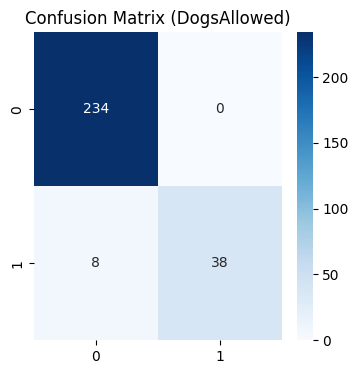

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load the data
df = df_combined

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['DogsAllowed']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Resample the training set
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a classifier on the resampled training set
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

# Evaluate the performance of the classifier on the testing set
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{report}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (DogsAllowed)')
plt.show()

# Attribute 3

1251
                business_id GoodForMeal_dinner
92   VdlPZg2NAu8t8GkdbPLecg              False
169  kyXEnWKQGWSThY6EcjORuw               True
242  dPxZI9lrKTl5dvFfnb1_Ig               True
294  _eKvk2GoGKb3CoYolHgRlg               True
701  PgJgpW4TKQ8IoALH2Yq-zA              False
1251
              business_id GoodForMeal_dinner  \
0  VdlPZg2NAu8t8GkdbPLecg              False   
1  kyXEnWKQGWSThY6EcjORuw               True   
2  dPxZI9lrKTl5dvFfnb1_Ig               True   
3  _eKvk2GoGKb3CoYolHgRlg               True   
4  PgJgpW4TKQ8IoALH2Yq-zA              False   

                                                text  
0  Wow. How disappointed am I. I placed a takeout...  
1  i used to eat the gyros here as a student and ...  
2  Ate here the other night with family and it wa...  
3  Excelente comida griega. Atención personalizad...  
4  Came here for dinner.\n\nCrab legs - pretty go...  
Classification Report:
              precision    recall  f1-score   support

       Fals

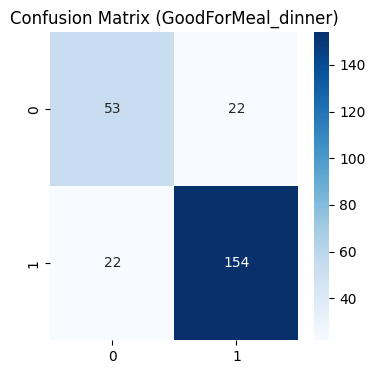

In [ ]:
# Filter the attribute dataset so it contains "business_id" and 3 corresponding Business Parking information(Popular Attribute)
df_attributes_3 = df_attributes.loc[:, ['business_id', 'GoodForMeal_dinner']]
df_attributes_3 = df_attributes_3.loc[~df_attributes_3.isin(['Na']).any(axis=1)]
# Create a list of unique business ids from the first dataset
business_ids = df_business['business_id'].unique()
# Filter the attribute dataset to only include rows with business ids from the business that has counts of review over 50
df_attributes_3 = df_attributes_3[df_attributes_3['business_id'].isin(business_ids)]
print(len(df_attributes_3))
print(df_attributes_3.head())

df_combined = df_attributes_3.merge(df_text_concat[['business_id', 'text']], on='business_id', how='left')
# Remove rows with missing values
df_combined = df_combined.dropna(subset=['text'])
print(len(df_combined))
print(df_combined.head())

# Load the data
df = df_combined

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['GoodForMeal_dinner']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Resample the training set
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a classifier on the resampled training set
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

# Evaluate the performance of the classifier on the testing set
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{report}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (GoodForMeal_dinner)')
plt.show()


# Task 2


In [ ]:
import pandas as pd
from textblob import TextBlob
import string
import nltk
import matplotlib as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/DS 3010/yelp_r.csv'
df = pd.read_csv(path, nrows=100000)

print(df['stars'].value_counts())


5    42719
4    23897
1    13267
3    11808
2     8309
Name: stars, dtype: int64


In [ ]:
# Group the data by star rating and randomly sample 2000 from each group
df_balanced = df.groupby('stars').apply(lambda x: x.sample(n=3000, random_state=42))

# Print the count of unique items with a specific column called 'stars'
print(df_balanced['stars'].value_counts())


1    3000
2    3000
3    3000
4    3000
5    3000
Name: stars, dtype: int64


# Case A Method

In [ ]:
def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list += ['restaurant', 'restaurants'] # add additional stopwords
    tokens = [token for token in tokens if token not in stopwords_list]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Handling negations
    negations = ['not', 'no', 'never']
    for i in range(len(tokens)):
        if tokens[i] in negations and i < len(tokens) - 1:
            tokens[i+1] = 'not_' + tokens[i+1]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


# Apply the preprocess_text function to the "text" column of the DataFrame
df_balanced['processed_text'] = df_balanced['text'].apply(preprocess_text)


# Evaluation Case A

# Random Forest

In [ ]:
# Extract the features and target variable
X = df_balanced['processed_text'].to_numpy()
y = df_balanced['stars'].to_numpy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = rf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.486
Precision: 0.4728187115337259
Recall: 0.48755736561191776
F1 score: 0.47150313246746023
Confusion matrix:
 [[460  71  28  12  28]
 [213 201 137  43  42]
 [ 64  86 212 163  49]
 [ 42  39 128 188 202]
 [ 44  13  31 107 397]]


ValueError: ignored

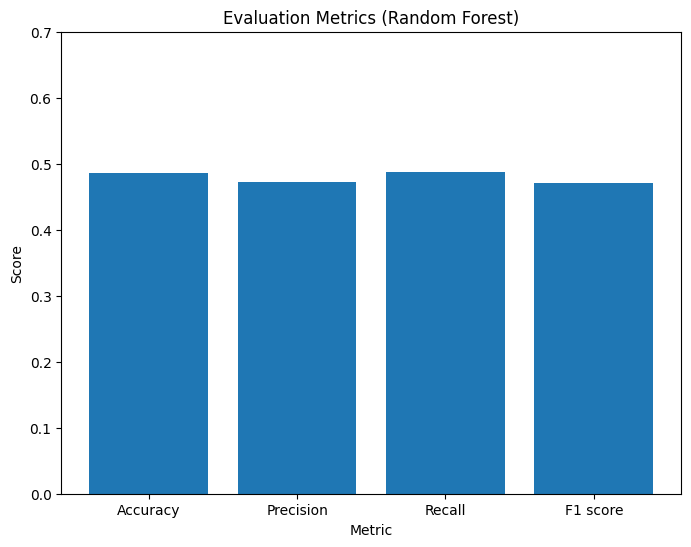

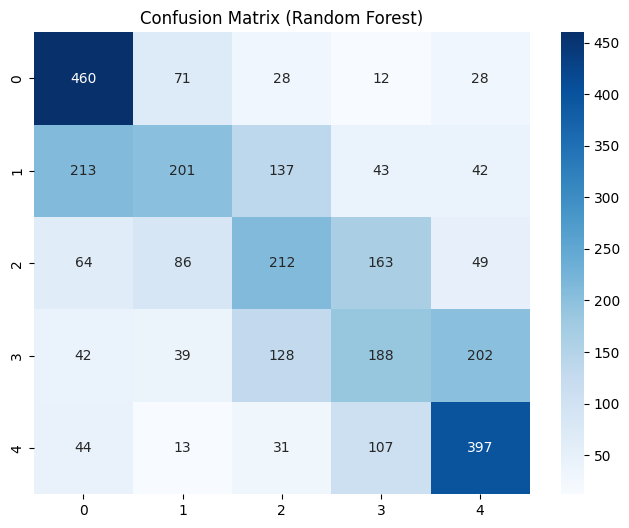

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.title('Evaluation Metrics (Random Forest)')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 0.7)
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


# KNN

In [ ]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = knn.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("K-Nearest Neighbors Model")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)




K-Nearest Neighbors Model
Accuracy: 0.326
Precision: 0.3212038243696063
Recall: 0.3267069416594396
F1 score: 0.3187174163573155
Confusion matrix:
 [[316  97  67  57  62]
 [175 129 141 129  62]
 [111  93 133 171  66]
 [ 98  82  99 214 106]
 [142  61  61 142 186]]


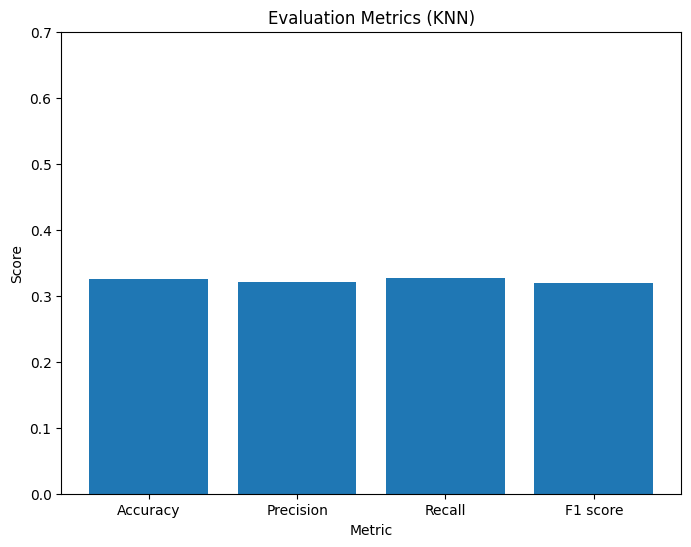

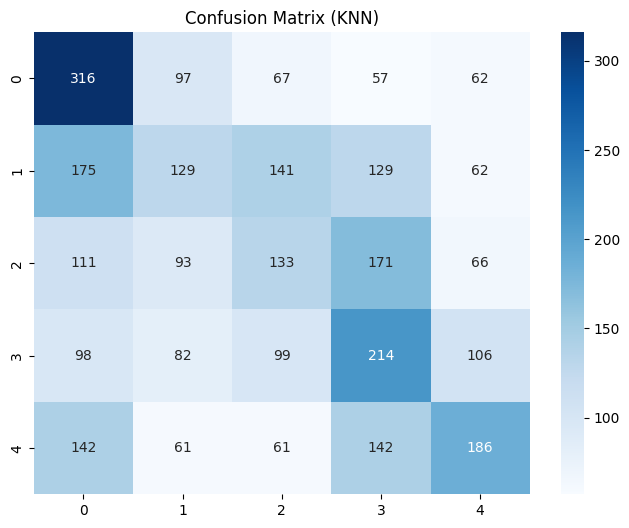

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.title('Evaluation Metrics (KNN)')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 0.7)
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (KNN)')
plt.show()
